In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import re
import gensim
import string

from sklearn.model_selection import train_test_split
from gensim.models import KeyedVectors
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

C:\Users\LENOVO\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\LENOVO\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\LENOVO\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
cwd = os.getcwd()
data_path = os.path.join(cwd, 'dataset')

In [3]:
df_processed = pd.read_csv(os.path.join(data_path, 'df_processed.csv'))
df_processed = df_processed.drop(columns = [df_processed.columns[0]])
df_processed.sample(5)

,berita,label
946,"['seru', 'uninstall', 'aplikasi', 'traveloka',...",0
175,"['unwto', 'video', 'competition', 'region', 'e...",0
1825,"['wali', 'kota', 'makassar', 'mohammad', 'ramd...",0
1155,"['wakil', 'ketua', 'komisi', 'berantas', 'koru...",1
954,"['aksi', 'walk', 'out', 'wo', 'pianis', 'anand...",0


In [4]:
df_processed['berita'] = df_processed['berita'].apply(lambda x : eval(x))

In [5]:
df_processed.isnull().sum()

berita    0
label     0
dtype: int64

In [6]:
X = df_processed['berita']
y = df_processed['label']

X.shape, y.shape

((2198,), (2198,))

In [7]:
model_path = os.path.join(cwd, 'model')
# path = os.path.join(model_path, 'word2vec2.model')
# model = gensim.models.word2vec.Word2Vec.load(path)

# model.build_vocab(X, update=True)
# model.train(X, total_examples=model.corpus_count, epochs=model.epochs)  

In [8]:
# word_vectors = model.wv
# word_vectors.save(os.path.join(model_path, "word2vec.wordvectors"))

# Load back with memory-mapping = read-only, shared across processes.
wv = KeyedVectors.load(os.path.join(model_path, "word2vec.wordvectors"), mmap='r')

vector = wv['computer']  # Get numpy vector of a word

In [9]:
EMBEDDING_DIM = vector.shape[0]

In [10]:
wv.most_similar(positive=["trump","obama", "clinton"])

[('hillary', 0.6062372326850891),
 ('reagan', 0.5985161066055298),
 ('eisenhower', 0.596887469291687),
 ('rodham', 0.5639836192131042),
 ('nixon', 0.5635133981704712),
 ('kennedy', 0.5560458898544312),
 ('roosevelt', 0.5547446012496948),
 ('truman', 0.5528954267501831),
 ('sirleaf', 0.5269852876663208),
 ('barack', 0.5190994143486023)]

In [11]:
vector

memmap([ 1.72352290e+00, -1.83798993e+00, -1.35575926e+00,
        -1.17041074e-01,  1.19458115e+00,  3.87547731e+00,
        -6.80154502e-01,  2.02292943e+00,  4.39364552e-01,
         5.76997995e-01,  3.44742656e+00,  5.74166119e-01,
        -2.99447179e+00,  6.12090707e-01, -7.23787367e-01,
        -7.22051740e-01, -2.90939093e-01,  1.51927543e+00,
        -1.12848306e+00,  5.55331707e-01,  2.92788267e+00,
         3.48406769e-02,  1.46782351e+00,  1.38434565e+00,
        -8.39121342e-01, -1.01582602e-01, -1.66014278e+00,
        -2.33312488e-01, -1.18575549e+00, -1.03784883e+00,
         1.44607151e+00,  9.93070960e-01, -9.93266582e-01,
         3.60394031e-01, -1.83221781e+00,  1.00411141e+00,
        -5.24737120e-01,  3.35959125e+00,  8.98863912e-01,
        -1.41647482e+00,  2.24933338e+00, -3.59520483e+00,
        -1.82924604e+00, -8.92490029e-01,  2.98667169e+00,
         4.46248621e-01, -2.25521445e+00,  1.08415782e+00,
         5.84394217e-01,  3.31225008e-01,  6.11944735e-0

In [12]:
len(wv)

332471

In [13]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

X_tokened = tokenizer.texts_to_sequences(X)

In [14]:
word_index = tokenizer.word_index
for word, num in word_index.items():
    print(f"{word} -> {num}")
    if num == 10:
        break    

sebut -> 1
jadi -> 2
kata -> 3
laku -> 4
orang -> 5
tidak -> 6
indonesia -> 7
ada -> 8
jelas -> 9
media -> 10


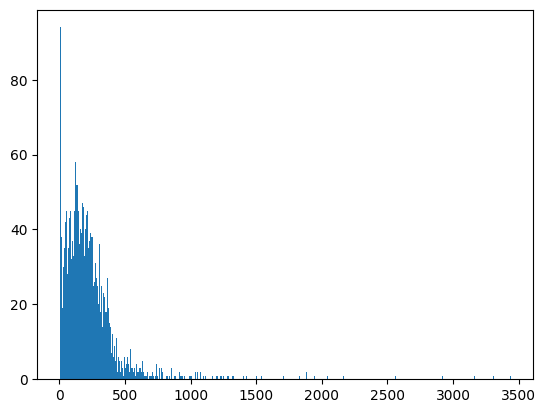

In [15]:
plt.hist([len(x) for x in X_tokened], bins=500)
plt.show()

In [16]:
nos = np.array([len(x) for x in X_tokened])
len(X_tokened), len(nos[nos  < 1000])

(2198, 2162)

In [17]:
maxlen = 1000 
vocab_size = list(word_index.values())[-1] + 1

#Making all news of size maxlen defined above
X_tokened = pad_sequences(X_tokened, maxlen=maxlen)

In [45]:
X_tokened[0]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [26]:
def get_weight_matrix(model, vocab):
    # total vocabulary size plus 0 for unknown words
    vocab_size = list(vocab.values())[-1] + 1
    # define weight matrix dimensions with all 0
    weight_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
    # step vocab, store vectors using the Tokenizer's integer mapping
    for word, i in vocab.items():
        try:
            weight_matrix[i] = model[word]
        except:
            weight_matrix[i] = np.zeros((EMBEDDING_DIM))
    return weight_matrix

In [44]:
wv['sebut']

memmap([ 1.7787999 , -0.9378022 ,  1.0060095 ,  0.16896859,  3.1498325 ,
        -3.715949  ,  2.030934  , -4.8869543 , -1.9737252 ,  2.173059  ,
        -1.3982035 ,  2.0623238 , -3.3763707 ,  0.49902654,  3.628274  ,
         3.744865  , -4.9337745 ,  3.867468  , -0.73850197,  0.86827576,
        -2.1857445 ,  3.0824468 , -0.63157225,  2.8810287 , -1.8537045 ,
         1.2335856 ,  1.0061756 , -2.7525938 , -1.2814913 , -0.68154544,
         1.3148609 , -0.69788593, -2.1942852 , -0.94398767,  1.5720196 ,
        -0.5822516 ,  3.5270689 ,  4.2941585 , -1.0492193 , -7.3668556 ,
        -1.416308  , -1.3949232 , -2.8897524 , -1.5958921 ,  1.7353532 ,
        -3.8356736 , -1.6109498 , -4.844603  ,  2.1372828 , -5.0528135 ,
         0.6345121 , -2.8495333 , -2.1295373 ,  1.7329582 ,  2.9347038 ,
        -1.3700193 ,  3.0358357 ,  0.37094435,  1.2258613 ,  0.92252296,
         5.3010883 , -1.0828347 ,  5.1263523 , -2.361489  , -1.1889045 ,
        -0.25904986, -3.3403466 ,  0.3232097 ,  1.1

In [42]:
list(word_index)[0]

'sebut'

In [27]:
embedding_vectors = get_weight_matrix(wv, word_index)

In [43]:
embedding_vectors[1]

array([ 1.77879989, -0.9378022 ,  1.00600946,  0.16896859,  3.14983249,
       -3.71594906,  2.0309341 , -4.88695431, -1.9737252 ,  2.17305899,
       -1.39820349,  2.06232381, -3.37637067,  0.49902654,  3.62827396,
        3.74486494, -4.93377447,  3.86746812, -0.73850197,  0.86827576,
       -2.18574452,  3.08244681, -0.63157225,  2.88102865, -1.85370445,
        1.2335856 ,  1.00617564, -2.75259376, -1.28149128, -0.68154544,
        1.31486094, -0.69788593, -2.19428515, -0.94398767,  1.57201958,
       -0.58225161,  3.52706885,  4.29415846, -1.04921925, -7.36685562,
       -1.41630805, -1.39492321, -2.88975239, -1.59589207,  1.73535323,
       -3.83567357, -1.61094975, -4.84460306,  2.13728285, -5.05281353,
        0.63451213, -2.84953332, -2.12953734,  1.7329582 ,  2.93470383,
       -1.37001932,  3.03583574,  0.37094435,  1.22586131,  0.92252296,
        5.30108833, -1.08283472,  5.12635231, -2.36148906, -1.18890452,
       -0.25904986, -3.34034657,  0.3232097 ,  1.17820334, -0.67

In [20]:
model = Sequential()
#Non-trainable embeddidng layer
model.add(Embedding(vocab_size, output_dim=EMBEDDING_DIM, weights=[embedding_vectors], input_length=maxlen, trainable=False))
#LSTM 
model.add(LSTM(units=128))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

del embedding_vectors

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 300)         8446500   
                                                                 
 lstm (LSTM)                 (None, 128)               219648    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 8666277 (33.06 MB)
Trainable params: 219777 (858.50 KB)
Non-trainable params: 8446500 (32.22 MB)
_________________________________________________________________


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_tokened, y, test_size=0.2, random_state=1000)

In [23]:
model.fit(X_train, y_train, validation_split=0.3, epochs=6)

Epoch 1/6
 6/39 [===>..........................] - ETA: 1:03 - loss: 0.6645 - acc: 0.5781

KeyboardInterrupt: 

In [ ]:
y_pred = (model.predict(X_test) >= 0.5).astype("int")